In [7]:
# https://github.com/laszewsk/mlcommons/commit/5ea94e88e1fc9ba58f994fb3425ab3594b76f92c
# all experiments done with
# mlcommons/benchmarks/earthquake/mar2022/FFFFWNPFEARTHQ_newTFTv29-gregor.ipynb
# tagged with version 1.0

/home/green/ENV3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


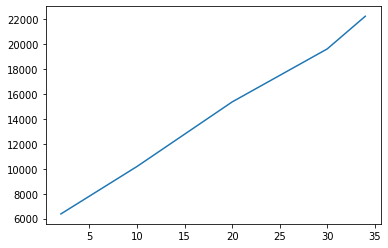

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

x = [2, 10, 20, 30, 34]
y = [6380, 10185, 15360, 19613, 22233]

sns.lineplot(x, y)
plt.show()

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
x_real = np.array(x).reshape((-1, 1))
y_real = np.array(y)
model = LinearRegression()
model.fit(x_real, y_real)



r_sq = model.score(x_real, y_real)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.9983134242654341
intercept: 5386.732142857143
slope: [487.88895089]


In [3]:
x_pred = [0, 2,10,20, 30, 40,50,60, 66]
x_pred_r = np.array(x_pred).reshape((-1, 1))

y_pred = model.predict(x_pred_r)

y_pred = [round(x) for x in y_pred]

print('predicted response:', y_pred, sep='\n')



predicted response:
[5387, 6363, 10266, 15145, 20023, 24902, 29781, 34660, 37587]


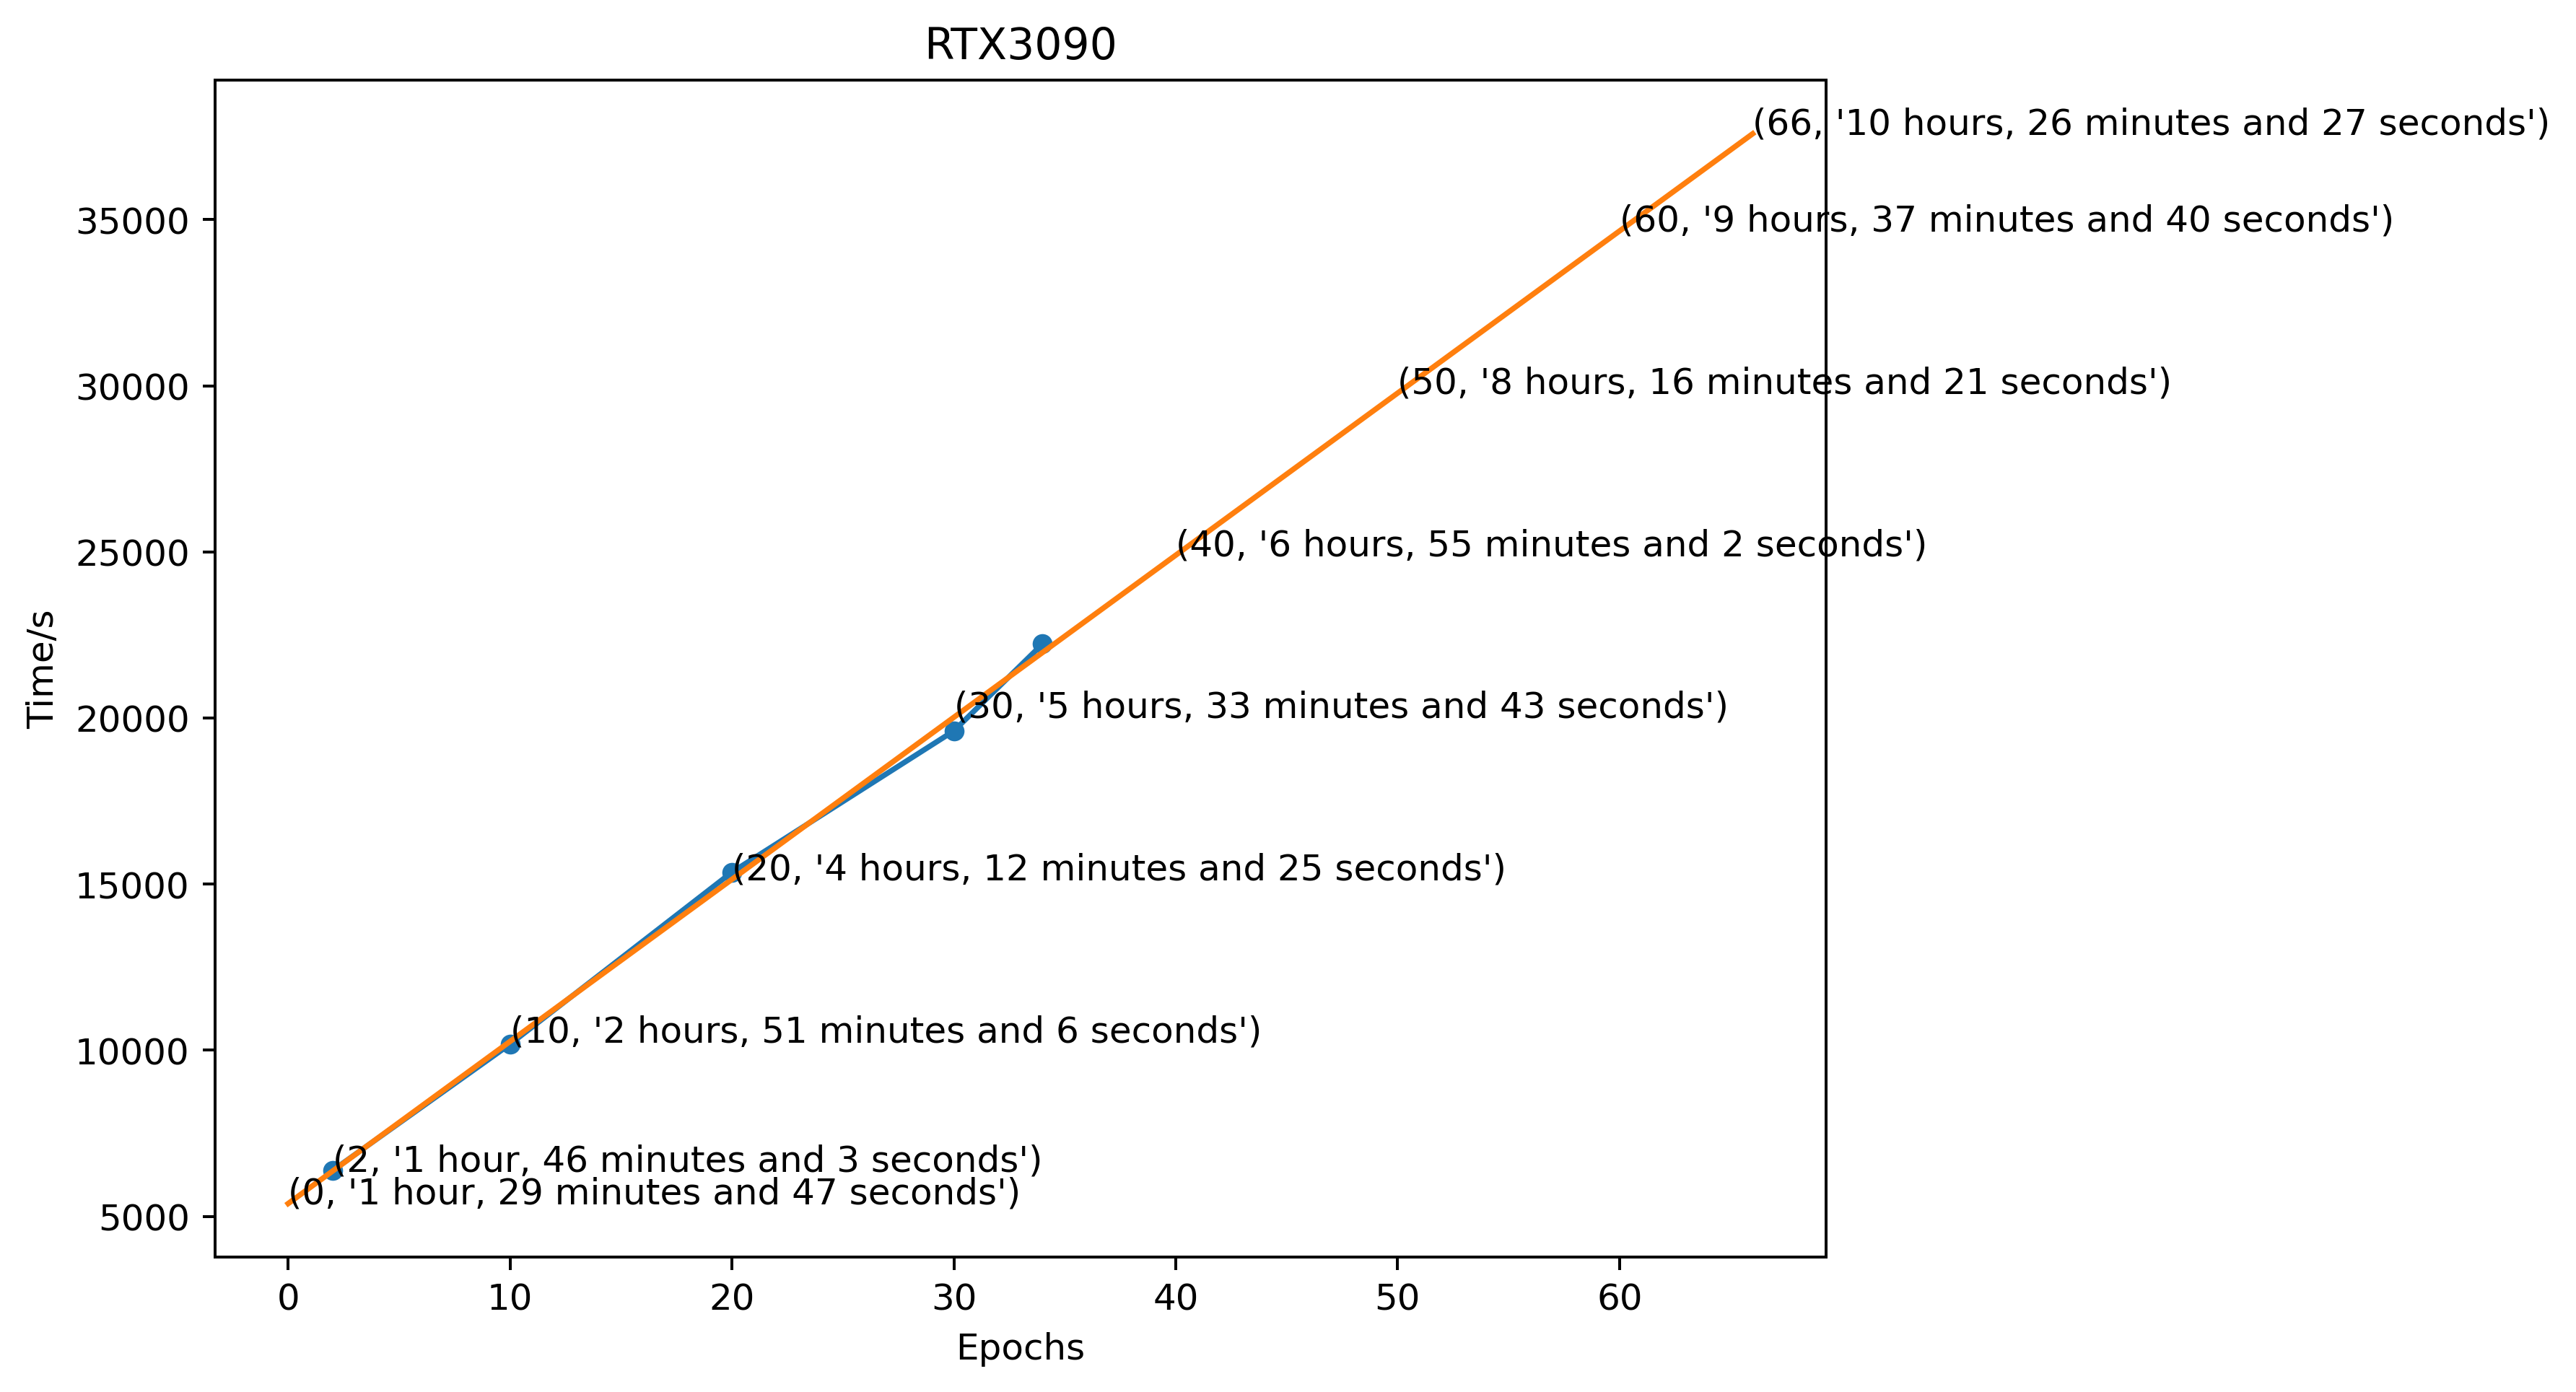

In [6]:
from matplotlib.pyplot import figure
import humanize
figure(figsize=(8, 6), dpi=360)

import matplotlib.pyplot as plt
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x_pred, y=y_pred)
plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("RTX3090")
for i in range(len(x_pred)):
    value = humanize.precisedelta(y_pred[i])
    plt.annotate(f"{x_pred[i], value}", (x_pred[i], y_pred[i]))

plt.axvline(33, min(y), max(y))
plt.show()
